In [111]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import ast
%matplotlib inline    


In [112]:
sample_file = pd.read_csv('/mnt/dzl_bioinf/binliu/deepRNA/major_revision/model_information/model_and_parameter_information.csv')

In [113]:
sample_file.columns

Index(['Run ID', 'Run Name', 'Model File Name', 'Config', 'Summary',
       'Download Path', 'Whether Sweep', 'Tags'],
      dtype='object')

(array([ 3.,  0.,  3.,  0., 47.,  0.,  3.,  0.,  3., 12.]),
 array([0. , 0.5, 1. , 1.5, 2. , 2.5, 3. , 3.5, 4. , 4.5, 5. ]),
 <BarContainer object of 10 artists>)

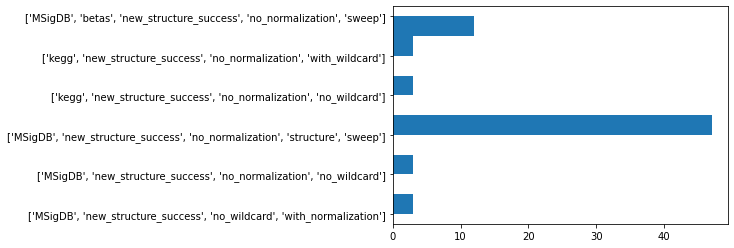

In [114]:
plt.hist(sample_file['Tags'], orientation="horizontal")

In [115]:
sample_file.head(5)

,Run ID,Run Name,Model File Name,Config,Summary,Download Path,Whether Sweep,Tags
0,40st3s32,driven-serenity-334,priorVAE_dynamic_model_40st3s32_MSigDB_zscore.pth,"{'model': {'latent_dim': 50, 'encoder_config':...","{'_runtime': 8842.714842796326, '_timestamp': ...",/mnt/dzl_bioinf/binliu/deepRNA/major_revision/...,No,"['MSigDB', 'new_structure_success', 'no_wildca..."
1,mxdk7t21,swift-energy-333,priorVAE_dynamic_model_mxdk7t21_MSigDB_zscore.pth,"{'model': {'latent_dim': 50, 'encoder_config':...","{'_runtime': 8793.23987531662, 'epoch_test_los...",/mnt/dzl_bioinf/binliu/deepRNA/major_revision/...,No,"['MSigDB', 'new_structure_success', 'no_wildca..."
2,r0ei40eo,distinctive-donkey-332,priorVAE_dynamic_model_r0ei40eo_MSigDB_zscore.pth,"{'model': {'latent_dim': 50, 'encoder_config':...","{'_wandb': {'runtime': 8834}, '_runtime': 8834...",/mnt/dzl_bioinf/binliu/deepRNA/major_revision/...,No,"['MSigDB', 'new_structure_success', 'no_wildca..."
3,em2fqtg9,exalted-jazz-331,priorVAE_dynamic_model_em2fqtg9_kegg_no_normal...,"{'model': {'latent_dim': 50, 'encoder_config':...","{'epoch_recon_train_loss': 2578.8801667929492,...",/mnt/dzl_bioinf/binliu/deepRNA/major_revision/...,No,"['MSigDB', 'new_structure_success', 'no_normal..."
4,8k6xrlks,expert-sweep-15,priorVAE_dynamic_model_8k6xrlks.pth,"{'model': {'latent_dim': 50, 'n_features_path'...","{'_wandb': {'runtime': 1867}, 'epoch_test_loss...",/mnt/dzl_bioinf/binliu/deepRNA/major_revision/...,Yes,"['MSigDB', 'new_structure_success', 'no_normal..."


In [116]:
index_of_interest = [i for i in range(sample_file.shape[0]) if ('sweep' in sample_file['Tags'][i]) and ('betas' in sample_file['Tags'][i])]

In [117]:
len(index_of_interest)

12

In [118]:
new_index_of_interest = [i for i in range(sample_file.shape[0]) if (str(sample_file['Tags'][i]) == "['MSigDB', 'new_structure_success', 'no_normalization', 'no_wildcard']") and (str(250) in sample_file['Config'][i])]

In [119]:
len(new_index_of_interest)

1

In [120]:
overall_index_of_interest = new_index_of_interest + index_of_interest

In [121]:
overall_index_of_interest

[7, 56, 57, 58, 59, 60, 62, 63, 65, 66, 67, 68, 69]

The most relevant experiments to the prior/latent dimension correlation is the betas sweep and the MSigDB new struction_success one with beta = 250 (which was not included in the prior at all). We select the models in this file to draw the boxplot and other metrics

In [122]:
beta_sweep_file = sample_file.iloc[overall_index_of_interest]

In [123]:
beta_sweep_file.shape

(13, 8)

In [124]:
beta_sweep_file.head()

,Run ID,Run Name,Model File Name,Config,Summary,Download Path,Whether Sweep,Tags
7,mmwhl929,robust-night-327,priorVAE_dynamic_model_mmwhl929_kegg_no_normal...,"{'model': {'latent_dim': 50, 'encoder_config':...","{'_wandb': {'runtime': 8851}, '_timestamp': 17...",/mnt/dzl_bioinf/binliu/deepRNA/major_revision/...,No,"['MSigDB', 'new_structure_success', 'no_normal..."
56,m4kyravz,kind-sweep-12,priorVAE_dynamic_model_m4kyravz.pth,"{'model': {'latent_dim': 50, 'encoder_config':...","{'epoch_kl_train_loss': 0.26834216622154683, '...",/mnt/dzl_bioinf/binliu/deepRNA/major_revision/...,Yes,"['MSigDB', 'betas', 'new_structure_success', '..."
57,uf100vsx,eager-sweep-11,priorVAE_dynamic_model_uf100vsx.pth,"{'model': {'latent_dim': 50, 'encoder_config':...","{'epoch_recon_test_loss': 14063.324183710083, ...",/mnt/dzl_bioinf/binliu/deepRNA/major_revision/...,Yes,"['MSigDB', 'betas', 'new_structure_success', '..."
58,edil514t,northern-sweep-10,priorVAE_dynamic_model_edil514t.pth,"{'model': {'latent_dim': 50, 'encoder_config':...","{'epoch_train_loss': 16407.166319389056, 'epoc...",/mnt/dzl_bioinf/binliu/deepRNA/major_revision/...,Yes,"['MSigDB', 'betas', 'new_structure_success', '..."
59,0d7y0uh0,sweet-sweep-9,priorVAE_dynamic_model_0d7y0uh0.pth,"{'model': {'latent_dim': 50, 'encoder_config':...","{'_wandb': {'runtime': 1776}, 'epoch_train_los...",/mnt/dzl_bioinf/binliu/deepRNA/major_revision/...,Yes,"['MSigDB', 'betas', 'new_structure_success', '..."


In [125]:
beta_val = []
for i in range(len(beta_sweep_file)):
    config_str = beta_sweep_file['Config'].iloc[i]
    config_dict = ast.literal_eval(config_str) 
    if 'beta' in config_dict['training']:
        beta = config_dict['training']['beta']
    else:
        beta = config_dict['training.beta']
    beta_val.append(beta)




In [126]:
for i in range(len(beta_sweep_file)):
    beta_sweep_file.loc[i, 'beta'] = beta_val[i]

/mnt/dzl_bioinf/exec/python_lib/pyTorch_GPU/lib/python3.7/site-packages/pandas/core/indexing.py:1667: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[key] = value


In [129]:
beta_sweep_file_sorted = beta_sweep_file.sort_values(by='beta', ascending=True)

In [130]:
beta_sweep_file_sorted.to_csv('/mnt/dzl_bioinf/binliu/deepRNA/major_revision/model_information/beta_relevant_models.csv', header=True)